In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


# notas_made Hoja 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset (reemplaza la ruta con la tuya)
df = pd.read_excel('/content/Drive/MyDrive/notas_made.xlsx')

# Ver información general del dataset
display(df.info())
display(df.describe())
print("=== NRO DE DATOS FALTANTES POR COLUMNA ===")
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10712 entries, 0 to 10711
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Carrera  10712 non-null  object
 1   Gestión  10712 non-null  int64 
 2   Periodo  10712 non-null  object
 3   C.I.     10712 non-null  object
 4   Sigla    10712 non-null  object
 5   Materia  10712 non-null  object
 6   Nota     10712 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 585.9+ KB


None

,Gestión,Nota
count,10712.000000,10712.000000
mean,2014.584485,32.236557
std,3.424275,26.338795
min,2009.000000,0.000000
25%,2012.000000,7.000000
50%,2015.000000,28.000000
75%,2018.000000,54.000000
max,2021.000000,214.000000


=== NRO DE DATOS FALTANTES POR COLUMNA ===


,0
Carrera,0
Gestión,0
Periodo,0
C.I.,0
Sigla,0
Materia,0
Nota,0


No hay ni un solo dato faltante en la hoja 1

In [ ]:
# Nombres de columnas a minúsculas y sin espacios
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['carrera', 'gestión', 'periodo', 'c.i.', 'sigla', 'materia', 'nota'], dtype='object')

# Verificando que datos llevan las siguientes columnas

In [ ]:
for col in ['carrera', 'sigla', 'materia', 'periodo', 'gestión']:
    print(f"--- {col} ---")
    print(df[col].unique())


--- carrera ---
['Biologia' 'Ciencias Químicas' 'Cs. Químicas' 'Estadística' 'Física'
 'Informática']
--- sigla ---
['BIO-99' 'FIS-99' 'MAT-99' 'QMC-99' 'COM-99' 'INF-99' 'PSA' 'LIN-99'
 'EST-99' 'GMT-99']
--- materia ---
['INTRODUCCIÓN A LA BIOLOGIA' 'INTRODUCCIÓN A LA FISICA'
 'INTRODUCCIÓN A LA MATEMATICA' 'INTRODUCCIÓN A LA QUIMICA'
 'INTRODUCCIÓN A LA COMPUTACION' 'INTRODUCCIÓN A LA INFORMATICA'
 'PRUEBA DE SUFICIENCIA ACADEMICA' 'TALLER DE LECTURA COMPRENSIVA'
 'INTRODUCCIÓN A LA ESTADISTICA' 'INTRODUCCIÓN A LA GEOMETRIA']
--- periodo ---
['SEGUNDO' 'PRIMERO' 'PRIMERO (PSA)' 'SEGUNDO (PSA)']
--- gestión ---
[2009 2010 2011 2012 2013 2015 2016 2017 2018 2019 2020 2021]


In [ ]:
# Ponemos en minuscula los datos de carrera y en mayuscula materia, periodo y sigla
df['carrera'] = df['carrera'].str.strip().str.lower()
df['materia'] = df['materia'].str.strip().str.upper()
df['periodo'] = df['periodo'].str.strip().str.upper()
df['sigla'] = df['sigla'].str.strip().str.upper()
df.head(10)

,carrera,gestión,periodo,c.i.,sigla,materia,nota
0,biologia,2009,SEGUNDO,9205199,BIO-99,INTRODUCCIÓN A LA BIOLOGIA,67
1,biologia,2009,SEGUNDO,9205199,FIS-99,INTRODUCCIÓN A LA FISICA,10
2,biologia,2009,SEGUNDO,9205199,MAT-99,INTRODUCCIÓN A LA MATEMATICA,16
3,biologia,2009,SEGUNDO,9205199,QMC-99,INTRODUCCIÓN A LA QUIMICA,35
4,biologia,2009,SEGUNDO,8324224,BIO-99,INTRODUCCIÓN A LA BIOLOGIA,51
5,biologia,2009,SEGUNDO,8324224,FIS-99,INTRODUCCIÓN A LA FISICA,51
6,biologia,2009,SEGUNDO,8324224,MAT-99,INTRODUCCIÓN A LA MATEMATICA,51
7,biologia,2009,SEGUNDO,8324224,QMC-99,INTRODUCCIÓN A LA QUIMICA,59
8,biologia,2009,SEGUNDO,5623343,BIO-99,INTRODUCCIÓN A LA BIOLOGIA,21
9,biologia,2009,SEGUNDO,5623343,FIS-99,INTRODUCCIÓN A LA FISICA,5


In [ ]:
# Números de filas antes de eliminar duplicados
print(f"Números de Filas antes de eliminar duplicados (Hoja 1): {len(df)}")

# Ver TODOS los duplicados (originales + duplicados), considerando carrera
duplicados_df = df[df.duplicated(subset=['c.i.', 'sigla', 'materia', 'gestión', 'periodo', 'carrera'], keep=False)]
print("Todas las filas involucradas en duplicados Hoja 1:")
display(duplicados_df.sort_values(by=['c.i.', 'sigla', 'materia', 'gestión', 'periodo', 'carrera']).head(20))


Números de Filas antes de eliminar duplicados (Hoja 1): 10712
Todas las filas involucradas en duplicados Hoja 1:


,carrera,gestión,periodo,c.i.,sigla,materia,nota


No hay filas duplicadas en la Hoja 1 considerando las columnas: 'c.i.', 'sigla', 'materia', 'gestión', 'periodo', 'carrera'



# Asegurando que las columnas nota y gestion sean de tipo entero

In [ ]:
# Asegurar que nota y gestión sean enteros
df['nota'] = df['nota'].astype(int)
df['gestión'] = df['gestión'].astype(int)
# Ver todos los tipos de dato
df.dtypes

,0
carrera,object
gestión,int64
periodo,object
c.i.,object
sigla,object
materia,object
nota,int64


# Revisión de si se llevó matemática por carrera, gestión y periodo en Hoja 1 tomando en cuenta la materia o sigla

In [ ]:
resultados_df1 = (
    df.groupby(['carrera', 'gestión', 'periodo'])
    .apply(lambda g: (
        'INTRODUCCIÓN A LA MATEMATICA' in g['materia'].values
        or 'MAT-99' in g['sigla'].values
    ))
    .reset_index(name='llevo_matematica')
)

# Mostrar cuándo SÍ se llevó
si_mate_df1 = resultados_df1[resultados_df1['llevo_matematica'] == True]
print("Carreras, gestiones y periodos donde SÍ se llevó Matemática (Hoja 1):")
display(si_mate_df1.head(30))
print("Carreras en las cuales si se llevo la materia de Matematica")
display(si_mate_df1['carrera'].unique())
print("====================================================")
# Mostrar cuándo NO se llevó
no_mate_df1 = resultados_df1[resultados_df1['llevo_matematica'] == False]
print("Carreras, gestiones y periodos donde NO se llevó Matemática (Hoja 1):")
display(no_mate_df1)
display(no_mate_df1['carrera'].unique())

Carreras, gestiones y periodos donde SÍ se llevó Matemática (Hoja 1):


<ipython-input-8-581d56667956>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (


,carrera,gestión,periodo,llevo_matematica
0,biologia,2009,SEGUNDO,True
1,biologia,2010,PRIMERO,True
2,biologia,2010,SEGUNDO,True
3,biologia,2011,PRIMERO,True
4,biologia,2011,SEGUNDO,True
5,biologia,2012,PRIMERO,True
6,biologia,2012,SEGUNDO,True
7,biologia,2013,PRIMERO,True
8,biologia,2013,SEGUNDO,True
9,biologia,2015,PRIMERO,True


Carreras en las cuales si se llevo la materia de Matematica


array(['biologia', 'ciencias químicas', 'cs. químicas', 'estadística',
       'física', 'informática'], dtype=object)

Carreras, gestiones y periodos donde NO se llevó Matemática (Hoja 1):


,carrera,gestión,periodo,llevo_matematica
16,biologia,2018,PRIMERO (PSA),False
18,biologia,2018,SEGUNDO (PSA),False
20,biologia,2019,PRIMERO (PSA),False
22,biologia,2019,SEGUNDO (PSA),False
23,biologia,2020,SEGUNDO (PSA),False
24,biologia,2021,PRIMERO (PSA),False
31,ciencias químicas,2018,PRIMERO (PSA),False
33,ciencias químicas,2018,SEGUNDO (PSA),False
35,ciencias químicas,2019,PRIMERO (PSA),False
37,ciencias químicas,2019,SEGUNDO (PSA),False


array(['biologia', 'ciencias químicas', 'estadística', 'física'],
      dtype=object)

Se llevó Matemáticas en todas las gestiones menos en algunas pero solo en los casos de PSA en el caso de Biología en las gestiones 2018, 2019, 2020, 2021, la carrera que siempre puso matemática en todas sus modalidades de ingreso fue Informática.

# SACANDO LOS PROMEDIOS Y CLASIFICANDO LA OBSERVACION HOJA1

In [ ]:
# Clasificación si no está definida ya
def clasificar_estado(n):
    if n < 16:
        return 'Abandono'
    elif n < 51:
        return 'Reprobado'
    else:
        return 'Aprobado'

# Filtrar solo biología
df_biologia = df[df['carrera'] == 'biologia']

# Agrupar y calcular promedio solo por CI (sin filtro de materias)
resultados_biologia = []

for (gestion, periodo), grupo in df_biologia.groupby(['gestión', 'periodo']):
    if not grupo.empty:
        promedio = grupo.groupby('c.i.')['nota'].mean().reset_index(name='nota_final')
        promedio['gestión'] = gestion
        promedio['periodo'] = periodo
        promedio['observacion'] = promedio['nota_final'].apply(clasificar_estado)
        resultados_biologia.append(promedio)

df_resultado_biologia = pd.concat(resultados_biologia, ignore_index=True)

# Reordenar columnas para que 'nota_final' sea la penúltima
cols = list(df_resultado_biologia.columns)
cols.remove('nota_final')
cols.insert(-1, 'nota_final')
df_resultado_biologia = df_resultado_biologia[cols]

df_resultado_biologia.head(20)


,c.i.,gestión,periodo,nota_final,observacion
0,4295732,2009,SEGUNDO,61.25,Aprobado
1,4299485,2009,SEGUNDO,42.25,Reprobado
2,4751856,2009,SEGUNDO,63.00,Aprobado
3,4755839,2009,SEGUNDO,0.00,Abandono
4,4766488,2009,SEGUNDO,8.00,Abandono
5,4842226,2009,SEGUNDO,0.00,Abandono
6,4895595,2009,SEGUNDO,31.25,Reprobado
7,4912733,2009,SEGUNDO,12.50,Abandono
8,5623343,2009,SEGUNDO,12.50,Abandono
9,5804498,2009,SEGUNDO,53.00,Aprobado


# Observaciones por gestión, periodo y materia

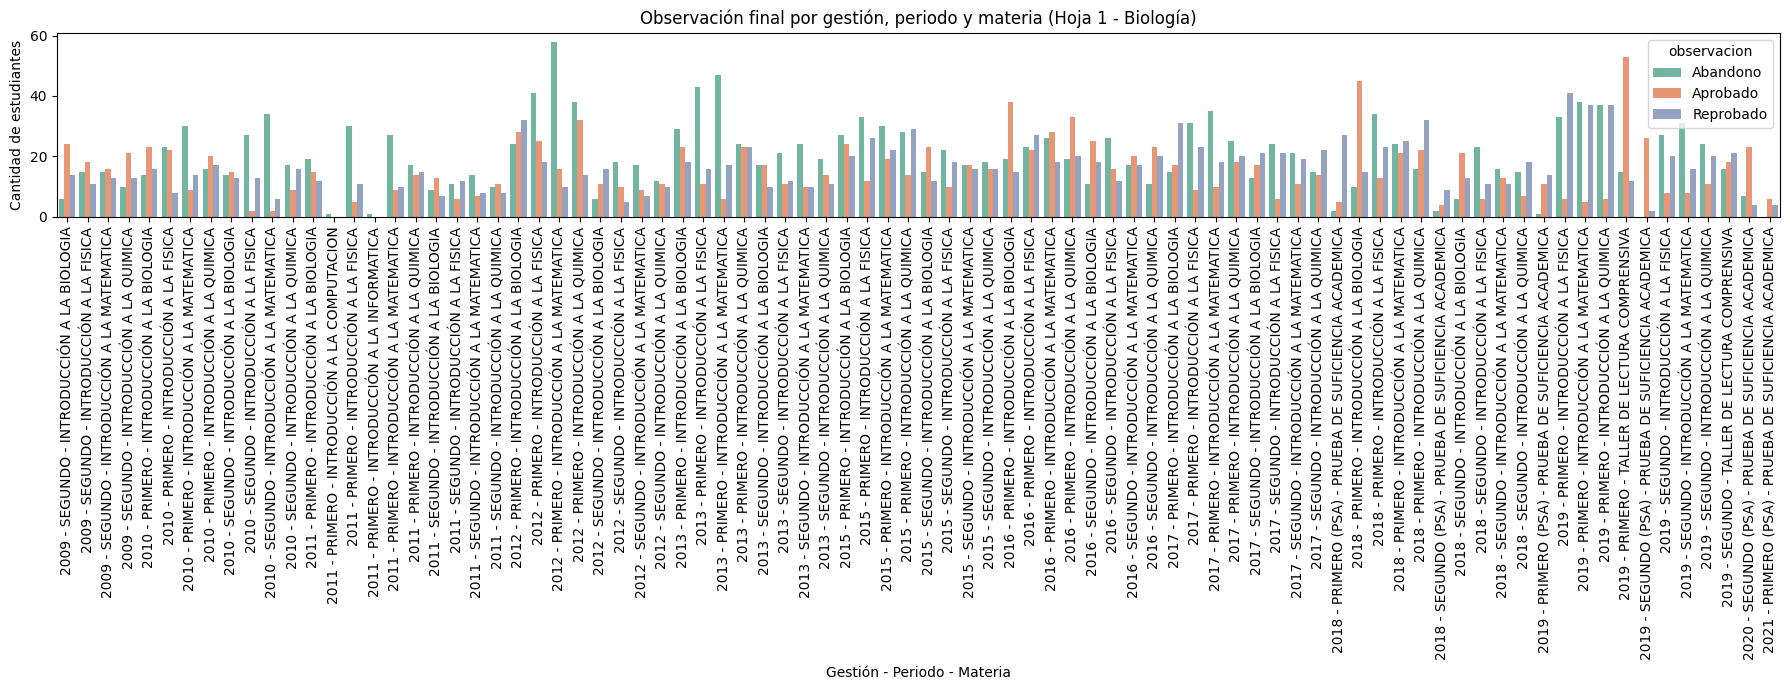

In [ ]:
import seaborn as sns

df_biologia = df[df['carrera'].str.lower().str.strip() == 'biologia'].copy()
df_biologia['observacion'] = df_biologia['nota'].apply(clasificar_estado)
df_biologia['grupo'] = df_biologia['gestión'].astype(str) + " - " + df_biologia['periodo'] + " - " + df_biologia['materia']

conteo_estado_materia_df1 = (
    df_biologia.groupby(['grupo', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

plt.figure(figsize=(18, 7))
sns.barplot(data=conteo_estado_materia_df1, x='grupo', y='cantidad', hue='observacion', palette='Set2')
plt.title("Observación final por gestión, periodo y materia (Hoja 1 - Biología)")
plt.xlabel("Gestión - Periodo - Materia")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Vemos que en la gestion 2012 - Primero, en la materia de Introduccion a la Matemática es cuando se registro un mayor número de abandonos, tambien en 2019 - Primero, en la materia de Introducción a la Física hubo un registro alto de reprobados y en 2019 - Primero en la materia de Taller de Lectura Comprensiva hubo una gran cantidad de aprobados. A simple vista no se puede determinar cuales fueron las materias menos abandonadas, reprobadas y aprobadas

# Análisis por gestión, periodo y materia para Biología Hoja 1

In [ ]:
# Asegurar limpieza de nombres
df['carrera'] = df['carrera'].str.strip().str.lower()

# Filtrar biología
df_biologia = df[df['carrera'] == 'biologia'].copy()

df_biologia['observacion'] = df_biologia['nota'].apply(clasificar_estado)

# Agrupación
conteo_estado_df1 = (
    df_biologia.groupby(['gestión', 'periodo', 'materia', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

# Función para extraer materia top por observación
def materia_top_por_estado(df, estado):
    return (
        df[df['observacion'] == estado]
        .sort_values(['gestión', 'periodo', 'cantidad'], ascending=[True, True, False])
        .drop_duplicates(subset=['gestión', 'periodo'])
        .reset_index(drop=True)
    )

# Resultados
abandonos_top_df1 = materia_top_por_estado(conteo_estado_df1, 'Abandono')
reprobados_top_df1 = materia_top_por_estado(conteo_estado_df1, 'Reprobado')
aprobados_top_df1 = materia_top_por_estado(conteo_estado_df1, 'Aprobado')

# Mostrar resultados
display(abandonos_top_df1)
display(reprobados_top_df1)
display(aprobados_top_df1)


,gestión,periodo,materia,observacion,cantidad
0,2009,SEGUNDO,INTRODUCCIÓN A LA FISICA,Abandono,15
1,2010,PRIMERO,INTRODUCCIÓN A LA MATEMATICA,Abandono,30
2,2010,SEGUNDO,INTRODUCCIÓN A LA MATEMATICA,Abandono,34
3,2011,PRIMERO,INTRODUCCIÓN A LA FISICA,Abandono,30
4,2011,SEGUNDO,INTRODUCCIÓN A LA MATEMATICA,Abandono,14
5,2012,PRIMERO,INTRODUCCIÓN A LA MATEMATICA,Abandono,58
6,2012,SEGUNDO,INTRODUCCIÓN A LA FISICA,Abandono,18
7,2013,PRIMERO,INTRODUCCIÓN A LA MATEMATICA,Abandono,47
8,2013,SEGUNDO,INTRODUCCIÓN A LA MATEMATICA,Abandono,24
9,2015,PRIMERO,INTRODUCCIÓN A LA FISICA,Abandono,33


,gestión,periodo,materia,observacion,cantidad
0,2009,SEGUNDO,INTRODUCCIÓN A LA BIOLOGIA,Reprobado,14
1,2010,PRIMERO,INTRODUCCIÓN A LA QUIMICA,Reprobado,17
2,2010,SEGUNDO,INTRODUCCIÓN A LA QUIMICA,Reprobado,16
3,2011,PRIMERO,INTRODUCCIÓN A LA QUIMICA,Reprobado,15
4,2011,SEGUNDO,INTRODUCCIÓN A LA FISICA,Reprobado,12
5,2012,PRIMERO,INTRODUCCIÓN A LA BIOLOGIA,Reprobado,32
6,2012,SEGUNDO,INTRODUCCIÓN A LA BIOLOGIA,Reprobado,16
7,2013,PRIMERO,INTRODUCCIÓN A LA QUIMICA,Reprobado,23
8,2013,SEGUNDO,INTRODUCCIÓN A LA FISICA,Reprobado,12
9,2015,PRIMERO,INTRODUCCIÓN A LA QUIMICA,Reprobado,29


,gestión,periodo,materia,observacion,cantidad
0,2009,SEGUNDO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,24
1,2010,PRIMERO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,23
2,2010,SEGUNDO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,15
3,2011,PRIMERO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,15
4,2011,SEGUNDO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,13
5,2012,PRIMERO,INTRODUCCIÓN A LA QUIMICA,Aprobado,32
6,2012,SEGUNDO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,11
7,2013,PRIMERO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,23
8,2013,SEGUNDO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,17
9,2015,PRIMERO,INTRODUCCIÓN A LA BIOLOGIA,Aprobado,24


En la 1ra Hoja Despues de ver estas tablas corroboramos que la materia de introduccion a la Matematica fue la mas abandonada el 2012 - Primero con 58 abandonos, y la materia menos abandonada fue la misma pero en la gestion 2011 - Segundo con 14 abandonos, tambien se ve que en efecto la materia mas reprobada fue Introducción a la Física en la gestion 2019 - Primero con 41 Reprobados y las materias (en este caso) menos reprobadas fueron tambien la de Introduccion a la Fisica en ambos casos con 12 reprobados en las gestiones 2011 y 2011 en ambos en el Segundo periodo, de la misma forma la materia de Taller de Lectura Comprensiva fue la mas aprobada con 53 aprobados en la gestion 2019 - Primero y la materia menos aprobada fue Introduccion a la Biologia en la gestion 2012 - Segundo.

Podemos decir que las materia mas dificil de aprobar en esta hoja es Introduccion a la Matematica, si es que consideramos sus registros de Abandono, al mismo tiempo que no suma registros de Reprobado o Aprobado. Y la materia mas facil de Aprobar es la de Introducción a la Biología, ya que es la que mas registros de aprobación lleva.

# Materias mas dificiles de aprobar considerando mas la Reprobación en todas las gestiones y periodos

Top materias más difíciles (más reprobados) – Hoja 1


,materia,cantidad_reprobados
3,INTRODUCCIÓN A LA QUIMICA,361
1,INTRODUCCIÓN A LA FISICA,328
2,INTRODUCCIÓN A LA MATEMATICA,294
0,INTRODUCCIÓN A LA BIOLOGIA,283
4,PRUEBA DE SUFICIENCIA ACADEMICA,60
5,TALLER DE LECTURA COMPRENSIVA,33


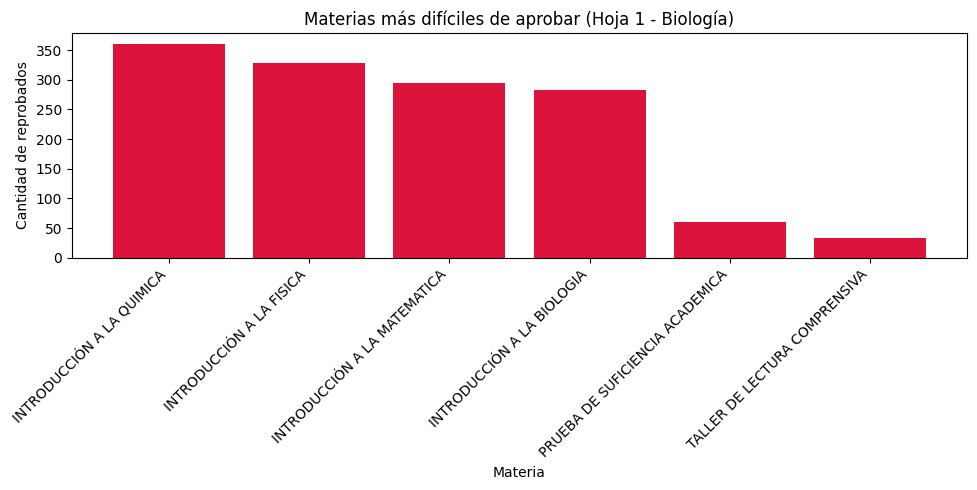

In [ ]:
# Refrescar df_biologia con observación
df_biologia = df[df['carrera'] == 'biologia'].copy()
df_biologia['observacion'] = df_biologia['nota'].apply(clasificar_estado)

# Agrupar por materia y contar reprobados
materias_dificiles_df1 = (
    df_biologia[df_biologia['observacion'] == 'Reprobado']
    .groupby('materia')
    .size()
    .reset_index(name='cantidad_reprobados')
    .sort_values('cantidad_reprobados', ascending=False)
)

# Mostrar top 10 más difíciles
print("Top materias más difíciles (más reprobados) – Hoja 1")
display(materias_dificiles_df1.head(10))

# Gráfico de columnas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(materias_dificiles_df1['materia'].head(10), materias_dificiles_df1['cantidad_reprobados'].head(10), color='crimson')
plt.title("Materias más difíciles de aprobar (Hoja 1 - Biología)")
plt.xlabel("Materia")
plt.ylabel("Cantidad de reprobados")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Claramente la materia mas dificil de aprobar es Introduccion a la Química, seguido de fisica y matemática, sumando todas las gestiones y periodos en la 1ra hoja

# Materias mas faciles de aprobar sumando todas las gestiones y periodos

Top materias más fáciles (más aprobados) – Hoja 1


,materia,cantidad_aprobados
0,INTRODUCCIÓN A LA BIOLOGIA,379
3,INTRODUCCIÓN A LA QUIMICA,319
2,INTRODUCCIÓN A LA MATEMATICA,236
1,INTRODUCCIÓN A LA FISICA,218
4,PRUEBA DE SUFICIENCIA ACADEMICA,75
5,TALLER DE LECTURA COMPRENSIVA,71


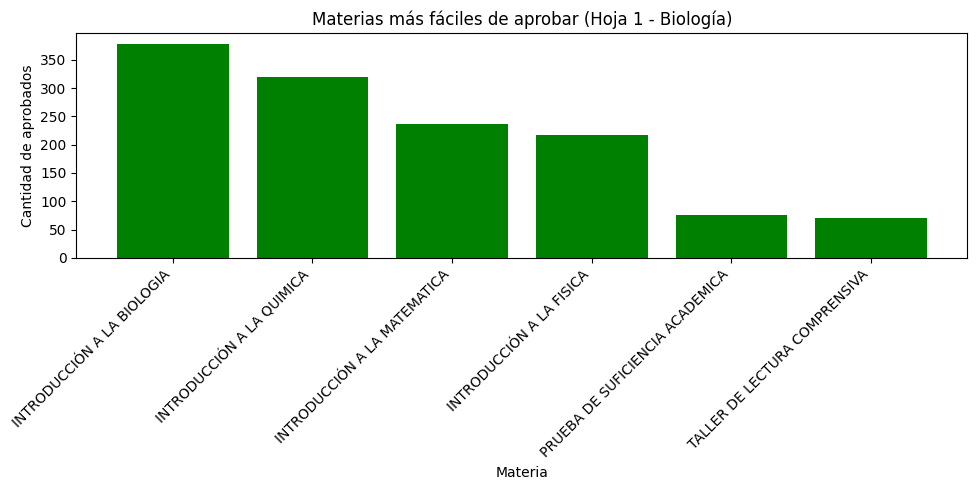

In [ ]:
# Refrescar df_biologia con observación
df_biologia = df[df['carrera'] == 'biologia'].copy()
df_biologia['observacion'] = df_biologia['nota'].apply(clasificar_estado)

# Agrupar por materia y contar aprobados
materias_faciles_df1 = (
    df_biologia[df_biologia['observacion'] == 'Aprobado']
    .groupby('materia')
    .size()
    .reset_index(name='cantidad_aprobados')
    .sort_values('cantidad_aprobados', ascending=False)
)

# Mostrar top 10 materias más fáciles
print("Top materias más fáciles (más aprobados) – Hoja 1")
display(materias_faciles_df1.head(10))

# Gráfico de columnas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(materias_faciles_df1['materia'].head(10), materias_faciles_df1['cantidad_aprobados'].head(10), color='green')
plt.title("Materias más fáciles de aprobar (Hoja 1 - Biología)")
plt.xlabel("Materia")
plt.ylabel("Cantidad de aprobados")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En la 1ra hoja de NotasMade, la materia mas facil de aprobar es Introduccion a la Biologia, y la mas dificil es Introduccion a la Quimica.

# Observacion de notas finales por gestión y periodo Hoja 1

Observación final por gestión y periodo (solo promedios finales)


observacion,Abandono,Aprobado,Reprobado
etiqueta,,,
2009 - SEGUNDO,11.0,16.0,17.0
2010 - PRIMERO,18.0,13.0,22.0
2010 - SEGUNDO,18.0,1.0,23.0
2011 - PRIMERO,20.0,7.0,19.0
2011 - SEGUNDO,11.0,8.0,10.0
2012 - PRIMERO,34.0,22.0,28.0
2012 - SEGUNDO,12.0,9.0,12.0
2013 - PRIMERO,36.0,8.0,26.0
2013 - SEGUNDO,20.0,12.0,12.0


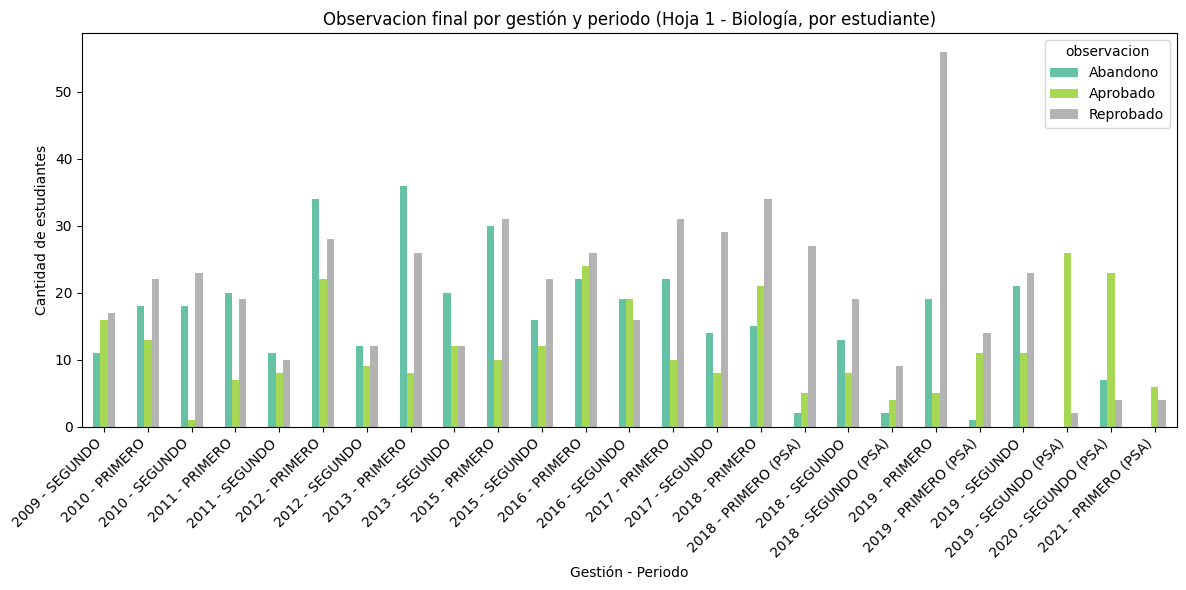

In [ ]:
# Agrupamos por gestión, periodo y observacion (ya con nota final)
obs_por_gestion_periodo_df1 = (
    df_resultado_biologia.groupby(['gestión', 'periodo', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

# Crear etiqueta para gráfico
obs_por_gestion_periodo_df1['etiqueta'] = obs_por_gestion_periodo_df1['gestión'].astype(str) + ' - ' + obs_por_gestion_periodo_df1['periodo']

# Pivot para gráfico
pivot_obs_gp_df1 = obs_por_gestion_periodo_df1.pivot(index='etiqueta', columns='observacion', values='cantidad').fillna(0)

# Mostrar tabla
print("Observación final por gestión y periodo (solo promedios finales)")
display(pivot_obs_gp_df1)

# Gráfico con datos correctos por estudiante
import matplotlib.pyplot as plt

pivot_obs_gp_df1.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Observacion final por gestión y periodo (Hoja 1 - Biología, por estudiante)")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Gestión - Periodo")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En la gestion 2013 periodo Primero es cuando hubo mas abandono y en donde hasta ni llego a existir abandono fue el 2019 en el periodo Segundo en el PSA. Tambien vemos que en la gestion 2019 periodo Primero es cuando hubo mas reprobados, y en donde existio menos reprobados fue en el segundo periodo en el PSA en la gestion 2020. En el periodo Segundo gestion 2020 en el PSA es cuando hubo mas aprobados, se podria decir la razon por la cual sucedió fue que los examenes se realizaban de forma virtual por estar en una situacion muy complicada por la Pandemia Covid2019, y cuando hubo menos aprobados fue en la gestion 2020 en el Primer periodo.

# Estudiantes inscritos por gestión y periodo Hoja 1

Número de estudiantes inscritos por gestión y periodo – Hoja 1


,gestión,periodo,inscritos
0,2009,SEGUNDO,44
1,2010,PRIMERO,53
2,2010,SEGUNDO,42
3,2011,PRIMERO,46
4,2011,SEGUNDO,29
5,2012,PRIMERO,84
6,2012,SEGUNDO,33
7,2013,PRIMERO,70
8,2013,SEGUNDO,44
9,2015,PRIMERO,71


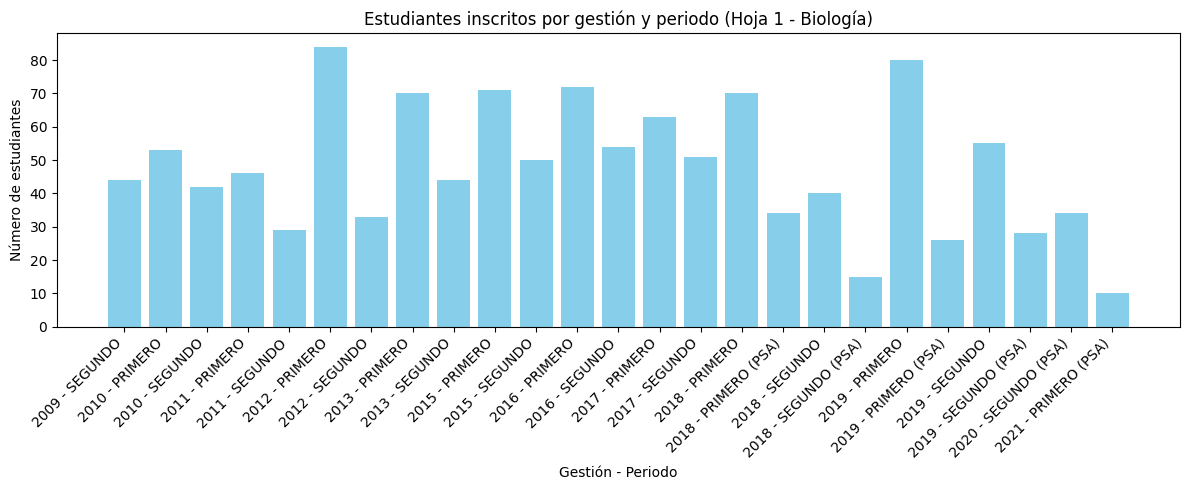

In [ ]:
# Refrescar df_biologia
df_biologia = df[df['carrera'] == 'biologia'].copy()

# Contar estudiantes únicos por gestión y periodo
inscritos_df1 = (
    df_biologia.groupby(['gestión', 'periodo'])['c.i.']
    .nunique()
    .reset_index(name='inscritos')
)

# Mostrar tabla
print("Número de estudiantes inscritos por gestión y periodo – Hoja 1")
display(inscritos_df1)

# Gráfico de barras
import matplotlib.pyplot as plt

# Combinar gestión y periodo como etiqueta
inscritos_df1['etiqueta'] = inscritos_df1['gestión'].astype(str) + ' - ' + inscritos_df1['periodo']

plt.figure(figsize=(12, 5))
plt.bar(inscritos_df1['etiqueta'], inscritos_df1['inscritos'], color='skyblue')
plt.title("Estudiantes inscritos por gestión y periodo (Hoja 1 - Biología)")
plt.ylabel("Número de estudiantes")
plt.xlabel("Gestión - Periodo")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


La gestion y periodo en la que mas inscritos hubo fue el 2012 - Primero con 84 inscritos, y en la que menos inscritos (sin contar PSA) hubo fue en la gestion y periodo 2011 - Segundo con 29 inscritos, si contamos las PSA en donde hubo menos inscritos fue el 2021 - Primero (PSA) con solo 10 postulantes.

# Observacion final por periodo Hoja 1

Cantidad de observaciones finales por periodo – Hoja 1 (por estudiante)


observacion,Abandono,Aprobado,Reprobado
periodo,,,
PRIMERO,216,120,273
PRIMERO (PSA),3,22,45
SEGUNDO,155,104,183
SEGUNDO (PSA),9,53,15


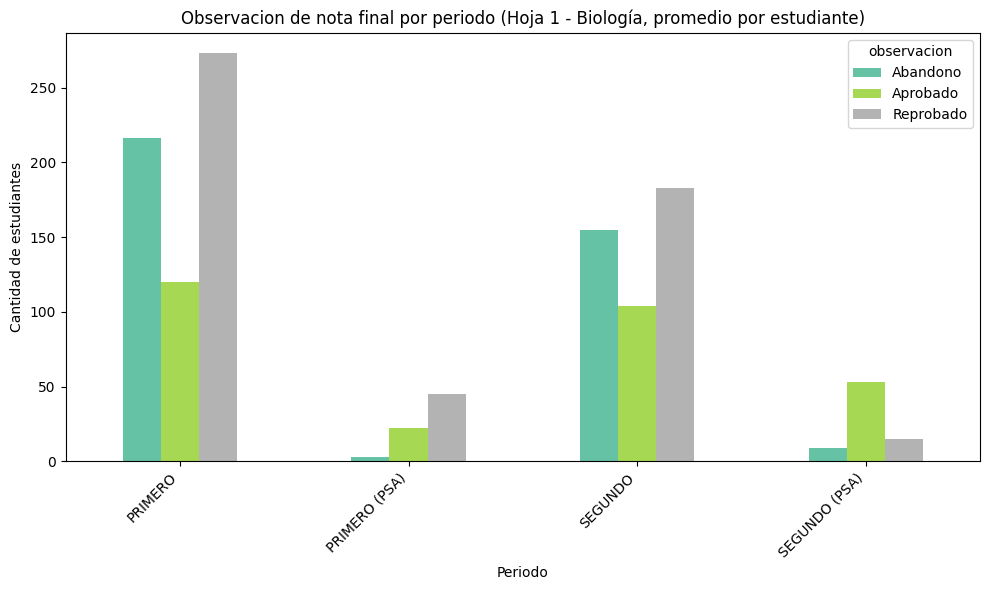

🟢 En Hoja 1, PERIODO con MÁS ABANDONO: PRIMERO
🔴 En Hoja 1, PERIODO con MENOS ABANDONO: PRIMERO (PSA)

🟢 En Hoja 1, PERIODO con MÁS REPROBADO: PRIMERO
🔴 En Hoja 1, PERIODO con MENOS REPROBADO: SEGUNDO (PSA)

🟢 En Hoja 1, PERIODO con MÁS APROBADO: PRIMERO
🔴 En Hoja 1, PERIODO con MENOS APROBADO: PRIMERO (PSA)



In [ ]:
# Agrupar por periodo y observación (ya con promedios por estudiante)
periodo_estado_df1 = (
    df_resultado_biologia.groupby(['periodo', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

# Pivot para graficar
pivot_periodo_df1 = periodo_estado_df1.pivot(index='periodo', columns='observacion', values='cantidad').fillna(0)

# Mostrar tabla
print("Cantidad de observaciones finales por periodo – Hoja 1 (por estudiante)")
display(pivot_periodo_df1)

# Gráfico
pivot_periodo_df1.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Observacion de nota final por periodo (Hoja 1 - Biología, promedio por estudiante)")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Periodo")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Máximos y mínimos por estado
for obs in ['Abandono', 'Reprobado', 'Aprobado']:
    if obs in pivot_periodo_df1.columns:
        print(f"🟢 En Hoja 1, PERIODO con MÁS {obs.upper()}: {pivot_periodo_df1[obs].idxmax()}")
        print(f"🔴 En Hoja 1, PERIODO con MENOS {obs.upper()}: {pivot_periodo_df1[obs].idxmin()}\n")


Vemos que en donde mas se Abandona, mas se reprueba y mas se aprueba es en el Primer periodo de cada año, y en las PSA es en donde menos Abandonos que Reprobados y Aprobados existen.

#notas_made Hoja 2

In [ ]:
df2 = pd.read_excel('/content/Drive/MyDrive/notas_made.xlsx', sheet_name='Notas Preuniversitario 2020 (po')
display(df2.info())
display(df2.describe())
print("=== NRO DE DATOS FALTANTES POR COLUMNA ===")
display(df2.isnull().sum())
display(df2.columns.tolist())  # Verifica nombres de columnas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10372 entries, 0 to 10371
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Carrera         10372 non-null  object 
 1   Gestión         10372 non-null  int64  
 2   Periodo         10372 non-null  object 
 3   C.I.            10372 non-null  object 
 4   Ap. Paterno     10290 non-null  object 
 5   Ap. Materno     10343 non-null  object 
 6   Nombres         10372 non-null  object 
 7   Sigla           10372 non-null  object 
 8   Materia         10372 non-null  object 
 9   Nota            10372 non-null  int64  
 10  Nota Ponderada  10232 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 891.5+ KB


None

,Gestión,Nota,Nota Ponderada
count,10372.0,10372.000000,10232.000000
mean,2020.0,35.462688,9.070954
std,0.0,29.798330,10.359601
min,2020.0,0.000000,0.000000
25%,2020.0,0.000000,0.000000
50%,2020.0,36.000000,5.000000
75%,2020.0,61.000000,16.000000
max,2020.0,100.000000,50.000000


=== NRO DE DATOS FALTANTES POR COLUMNA ===


,0
Carrera,0
Gestión,0
Periodo,0
C.I.,0
Ap. Paterno,82
Ap. Materno,29
Nombres,0
Sigla,0
Materia,0
Nota,0


['Carrera',
 'Gestión',
 'Periodo',
 'C.I.',
 'Ap. Paterno',
 'Ap. Materno',
 'Nombres',
 'Sigla',
 'Materia',
 'Nota',
 'Nota Ponderada']

Existen datos faltantes en Ap. Paterno con	82 datos faltantes, Ap. Materno	29 datos faltantes y Nota Ponderada	140 datos faltantes.

In [ ]:
# Nombres de columnas a minúsculas y sin espacios
df2.columns = df2.columns.str.strip().str.lower()
for col in ['carrera', 'sigla', 'materia', 'periodo', 'gestión']:
    if col in df2.columns:
        print(f"--- {col} ---")
        print(df2[col].unique())


--- carrera ---
['Biologia' 'Ciencias Químicas' 'Estadística' 'Física' 'Informática'
 'Matemática']
--- sigla ---
['FIS-99' 'LIN-99' 'MAT-99' 'QMC-99' '2T' 'INF-99']
--- materia ---
['INTRODUCCIÓN A LA FISICA' 'TALLER DE LECTURA COMPRENSIVA'
 'INTRODUCCIÓN A LA MATEMATICA' 'INTRODUCCIÓN A LA QUIMICA'
 'SEGUNDO TURNO' 'INTRODUCCIÓN A LA INFORMATICA']
--- periodo ---
['PRIMERO' 'PRIMERO (2T)' 'PRIMERO (PSA)' 'SEGUNDO']
--- gestión ---
[2020]


# Rellenamos los Apellidos Paterno y Materno faltantes para no perder Notas resgistradas

In [ ]:
df2['ap. paterno'] = df2['ap. paterno'].fillna('NO REGISTRA')
df2['ap. materno'] = df2['ap. materno'].fillna('NO REGISTRA')
df2['nota ponderada'] = df2['nota ponderada'].fillna(0.0) # si no se registro probablemente sacaron 0
df2.isnull().sum()

,0
carrera,0
gestión,0
periodo,0
c.i.,0
ap. paterno,0
ap. materno,0
nombres,0
sigla,0
materia,0
nota,0


In [ ]:
# Ponemos en minuscula los datos de carrera y en mayuscula materia, periodo y sigla
df2['carrera'] = df2['carrera'].str.strip().str.lower()
df2['materia'] = df2['materia'].str.strip().str.upper()
df2['periodo'] = df2['periodo'].str.strip().str.upper()
df2['sigla'] = df2['sigla'].str.strip().str.upper()
df2.head()

,carrera,gestión,periodo,c.i.,ap. paterno,ap. materno,nombres,sigla,materia,nota,nota ponderada
0,biologia,2020,PRIMERO,5995416,ALIAGA,GUTIERREZ,RODRIGO CESAR,FIS-99,INTRODUCCIÓN A LA FISICA,30,3.0
1,biologia,2020,PRIMERO,5995416,ALIAGA,GUTIERREZ,RODRIGO CESAR,LIN-99,TALLER DE LECTURA COMPRENSIVA,78,24.0
2,biologia,2020,PRIMERO,5995416,ALIAGA,GUTIERREZ,RODRIGO CESAR,MAT-99,INTRODUCCIÓN A LA MATEMATICA,42,21.0
3,biologia,2020,PRIMERO,5995416,ALIAGA,GUTIERREZ,RODRIGO CESAR,QMC-99,INTRODUCCIÓN A LA QUIMICA,44,5.0
4,biologia,2020,PRIMERO,8414271,ARIAS,HUAYLLER,JESUS SANTIAGO,FIS-99,INTRODUCCIÓN A LA FISICA,41,5.0


In [ ]:
# Asegurar que nota, gestión y nota ponderada sean enteros
df2['nota'] = df2['nota'].astype(int)
df2['gestión'] = df2['gestión'].astype(int)
df2['nota ponderada'] = df2['nota ponderada'].astype(float)
df2.dtypes

,0
carrera,object
gestión,int64
periodo,object
c.i.,object
ap. paterno,object
ap. materno,object
nombres,object
sigla,object
materia,object
nota,int64


# Filas duplicadas

In [ ]:
print(f"Filas antes de eliminar duplicados en df2 (Hoja 2): {len(df2)}")

# Ver TODOS los duplicados (originales + duplicados), considerando carrera
duplicados_df2 = df2[df2.duplicated(subset=['c.i.', 'sigla', 'materia', 'gestión', 'periodo', 'carrera'], keep=False)]
print("Todas las filas involucradas en duplicados (df2 - Hoja 2):")
display(duplicados_df2.sort_values(by=['c.i.', 'sigla', 'materia', 'gestión', 'periodo', 'carrera']).head(20))


Filas antes de eliminar duplicados en df2 (Hoja 2): 10372
Todas las filas involucradas en duplicados (df2 - Hoja 2):


,carrera,gestión,periodo,c.i.,ap. paterno,ap. materno,nombres,sigla,materia,nota,nota ponderada


No hay filas duplicadas en la Hoja 2 considerando las columnas: 'c.i.', 'sigla', 'materia', 'gestión', 'periodo', 'carrera'


# Filas duplicadas sin considerar la carrera

In [ ]:
print(f"Filas antes de eliminar duplicados en df2 (Hoja 2): {len(df2)}")

# Ver TODOS los duplicados (originales + duplicados), considerando carrera
duplicados_df2 = df2[df2.duplicated(subset=['c.i.', 'sigla', 'materia', 'gestión', 'periodo'], keep=False)]
print("Todas las filas involucradas en duplicados (df2 - Hoja 2):")
display(duplicados_df2.sort_values(by=['c.i.', 'sigla', 'materia', 'gestión', 'periodo']).head(20))


Filas antes de eliminar duplicados en df2 (Hoja 2): 10372
Todas las filas involucradas en duplicados (df2 - Hoja 2):


,carrera,gestión,periodo,c.i.,ap. paterno,ap. materno,nombres,sigla,materia,nota,nota ponderada
436,biologia,2020,SEGUNDO,8303925,CALLIZAYA,POCOACA,WENDY,FIS-99,INTRODUCCIÓN A LA FISICA,0,0.0
6417,informática,2020,SEGUNDO,8303925,CALLIZAYA,POCOACA,WENDY,FIS-99,INTRODUCCIÓN A LA FISICA,39,4.0
437,biologia,2020,SEGUNDO,8303925,CALLIZAYA,POCOACA,WENDY,LIN-99,TALLER DE LECTURA COMPRENSIVA,0,0.0
6419,informática,2020,SEGUNDO,8303925,CALLIZAYA,POCOACA,WENDY,LIN-99,TALLER DE LECTURA COMPRENSIVA,26,8.0
438,biologia,2020,SEGUNDO,8303925,CALLIZAYA,POCOACA,WENDY,MAT-99,INTRODUCCIÓN A LA MATEMATICA,0,0.0
6420,informática,2020,SEGUNDO,8303925,CALLIZAYA,POCOACA,WENDY,MAT-99,INTRODUCCIÓN A LA MATEMATICA,30,15.0
320,biologia,2020,PRIMERO,9914223,ZARATE,PACO,ELSA EDITH,FIS-99,INTRODUCCIÓN A LA FISICA,0,0.0
5103,informática,2020,PRIMERO,9914223,ZARATE,PACO,ELSA EDITH,FIS-99,INTRODUCCIÓN A LA FISICA,53,6.0
321,biologia,2020,PRIMERO,9914223,ZARATE,PACO,ELSA EDITH,LIN-99,TALLER DE LECTURA COMPRENSIVA,0,0.0
5105,informática,2020,PRIMERO,9914223,ZARATE,PACO,ELSA EDITH,LIN-99,TALLER DE LECTURA COMPRENSIVA,84,26.0


Sin considerar la carrera, vemos que si hay dos postulantes que tienen datos duplicados en cuanto a las notas, pero observamos que puede haber sido un error en los registros de notas y que solo hayan postulado a una sola carrera ó se inscribieron a las dos carreras y abandonaron Biologia en ambos casos.

# Revisar si se llevó matemática por carrera, gestión y periodo en Hoja 2

In [ ]:
# Colocando en mayuscula campos para asegurar coincidencias
df2['materia'] = df2['materia'].str.strip().str.upper()
df2['sigla'] = df2['sigla'].str.strip().str.upper()

resultados_df2 = (
    df2.groupby(['carrera', 'gestión', 'periodo'])
    .apply(lambda g: (
        'INTRODUCCIÓN A LA MATEMATICA' in g['materia'].values
        or 'MAT-99' in g['sigla'].values
    ))
    .reset_index(name='llevo_matematica')
)

# Mostrar cuándo SÍ se llevó
si_mate_df2 = resultados_df2[resultados_df2['llevo_matematica'] == True]
print("Carreras, gestiones y periodos donde SÍ se llevó Matemática (Hoja 2):")
display(si_mate_df2)
display(si_mate_df2['carrera'].unique())

# Mostrar cuándo NO se llevó
no_mate_df2 = resultados_df2[resultados_df2['llevo_matematica'] == False]
print("Carreras, gestiones y periodos donde NO se llevó Matemática (Hoja 2):")
display(no_mate_df2)


Carreras, gestiones y periodos donde SÍ se llevó Matemática (Hoja 2):


<ipython-input-24-a33cbaf39b43>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (


,carrera,gestión,periodo,llevo_matematica
0,biologia,2020,PRIMERO,True
2,biologia,2020,PRIMERO (PSA),True
3,biologia,2020,SEGUNDO,True
4,ciencias químicas,2020,PRIMERO,True
6,ciencias químicas,2020,PRIMERO (PSA),True
7,ciencias químicas,2020,SEGUNDO,True
8,estadística,2020,PRIMERO,True
10,estadística,2020,PRIMERO (PSA),True
11,estadística,2020,SEGUNDO,True
12,física,2020,PRIMERO,True


array(['biologia', 'ciencias químicas', 'estadística', 'física',
       'informática', 'matemática'], dtype=object)

Carreras, gestiones y periodos donde NO se llevó Matemática (Hoja 2):


,carrera,gestión,periodo,llevo_matematica
1,biologia,2020,PRIMERO (2T),False
5,ciencias químicas,2020,PRIMERO (2T),False
9,estadística,2020,PRIMERO (2T),False
13,física,2020,PRIMERO (2T),False
17,informática,2020,PRIMERO (2T),False
21,matemática,2020,PRIMERO (2T),False


# SACANDO LOS PROMEDIOS Y CLASIFICANDO LA OBSERVACION HOJA2

In [ ]:
# Unir columnas de nombres y apellidos en uno solo
df2['nombre_completo'] = (
    df2['ap. paterno'].fillna('') + ' ' +
    df2['ap. materno'].fillna('') + ' ' +
    df2['nombres'].fillna('')
).str.strip()

# Clasificación actualizada
def clasificar_observacion(n):
    if n < 16:
        return 'Abandono'
    elif n < 51:
        return 'Reprobado'
    else:
        return 'Aprobado'

# Filtrar solo estudiantes de biología
df2_biologia = df2[df2['carrera'] == 'biologia']
df2_biologia['periodo'] = df2_biologia['periodo'].str.strip().str.upper()

# Análisis por gestión y periodo (sin filtro de materias)
resultados_biologia_df2 = []

for (gestion, periodo), grupo in df2_biologia.groupby(['gestión', 'periodo']):
    if not grupo.empty:
        promedio = grupo.groupby(['c.i.', 'nombre_completo'])['nota'].mean().reset_index(name='nota_final')
        promedio['gestión'] = gestion
        promedio['periodo'] = periodo
        promedio['observacion'] = promedio['nota_final'].apply(clasificar_observacion)
        resultados_biologia_df2.append(promedio)

# Resultado final
df2_resultado_biologia = pd.concat(resultados_biologia_df2, ignore_index=True)

# Reordenar columnas para que 'nota_final' sea la penúltima
cols = list(df2_resultado_biologia.columns)
cols.remove('nota_final')
cols.insert(-1, 'nota_final')
df2_resultado_biologia = df2_resultado_biologia[cols]

# Mostrar los primeros 20 registros
df2_resultado_biologia.head(20)


<ipython-input-25-87750acd7b90>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_biologia['periodo'] = df2_biologia['periodo'].str.strip().str.upper()


,c.i.,nombre_completo,gestión,periodo,nota_final,observacion
0,5995416,ALIAGA GUTIERREZ RODRIGO CESAR,2020,PRIMERO,48.50,Reprobado
1,6192745,FINOT COPA PATRICIA ENYNE,2020,PRIMERO,39.50,Reprobado
2,6195026,VENEGAS NOGALES MARIANA INES,2020,PRIMERO,57.75,Aprobado
3,6721530,LEON SALINAS MATIAS FERNANDO,2020,PRIMERO,74.00,Aprobado
4,6736148,GUERRA GUZMAN BENJAMIN PATRICK,2020,PRIMERO,0.00,Abandono
5,6789279,ROJAS ENRIQUEZ SEBASTIAN ALEJAN,2020,PRIMERO,12.00,Abandono
6,6838721,CACERES ALVAREZ CAMILA BELEN,2020,PRIMERO,49.75,Reprobado
7,6842096,MEALLA DELGADO HUGO RAUL,2020,PRIMERO,54.50,Aprobado
8,6940437,CHAMBI CHAMBI JESUS GIOVANNI,2020,PRIMERO,56.25,Aprobado
9,6964937,MURGA LOPEZ YUNNY PAOLA,2020,PRIMERO,0.00,Abandono


# Exportando los promedios mas la observacion

In [ ]:
# Exportar ambos DataFrames a un solo archivo Excel con dos hojas
with pd.ExcelWriter('resultados_biologia.xlsx') as writer:
    df_resultado_biologia.to_excel(writer, sheet_name='Sin nombres', index=False)
    df2_resultado_biologia.to_excel(writer, sheet_name='Con nombres', index=False)


# Observaciones por gestión, periodo y materia

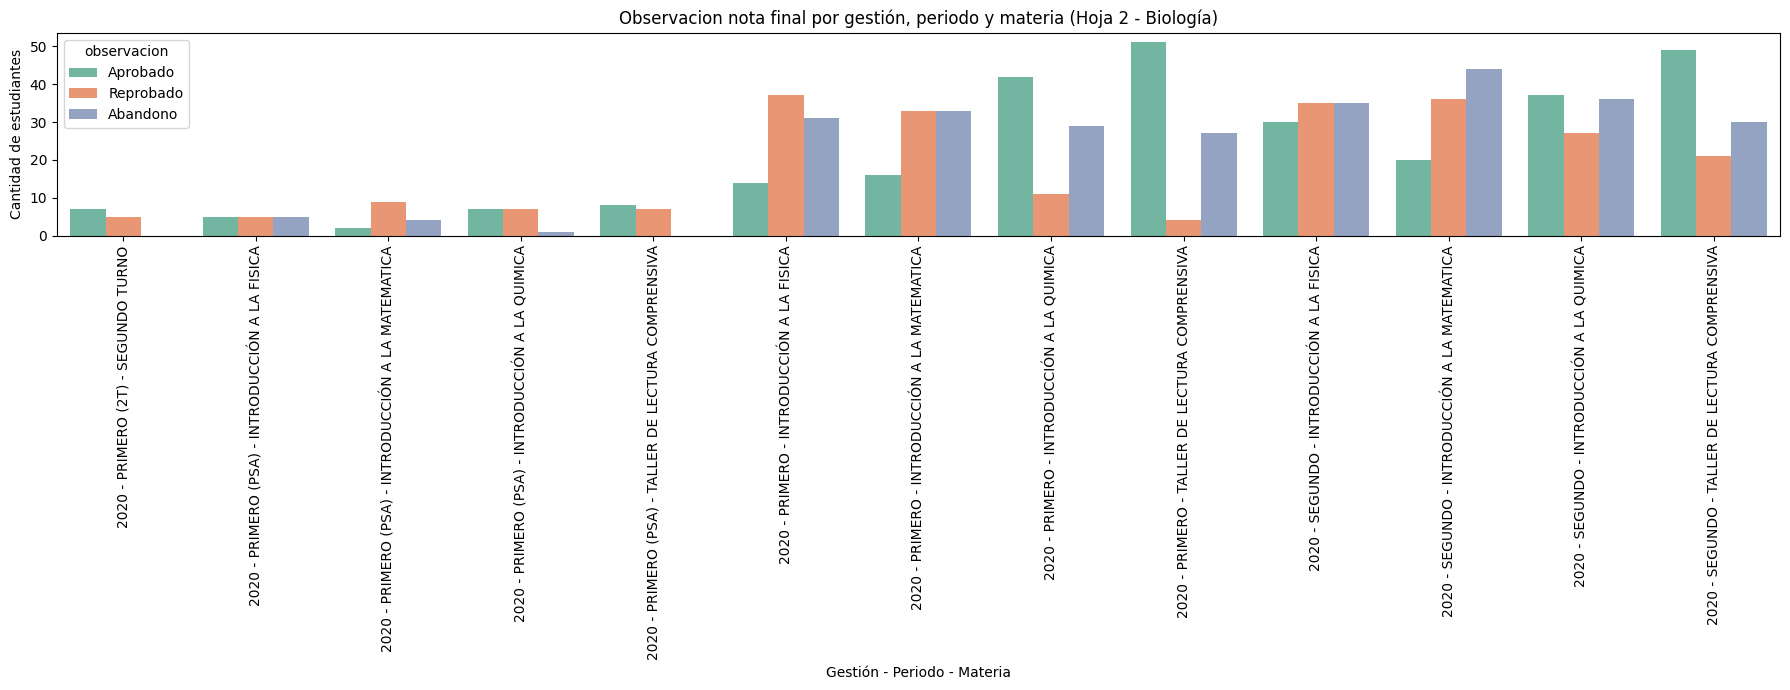

In [ ]:
df2_biologia = df2[df2['carrera'].str.lower().str.strip() == 'biologia'].copy()
df2_biologia['observacion'] = df2_biologia['nota'].apply(clasificar_estado)
df2_biologia['grupo'] = df2_biologia['gestión'].astype(str) + " - " + df2_biologia['periodo'] + " - " + df2_biologia['materia']

conteo_estado_materia_df2 = (
    df2_biologia.groupby(['grupo', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

plt.figure(figsize=(18, 7))
sns.barplot(data=conteo_estado_materia_df2, x='grupo', y='cantidad', hue='observacion', palette='Set2')
plt.title("Observacion nota final por gestión, periodo y materia (Hoja 2 - Biología)")
plt.xlabel("Gestión - Periodo - Materia")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Vemos en la 2da hoja que la materia mas Aprobada es la de Taller de lectura comprensiva en la gestion 2020 Primer periodo y la menos Aprobada es Introduccion a la Matematica, la mas Reprobada es Introduccion a la Fisica en la Gestion 2020 Primer periodo, la menos Reprobada es Taller de Lectura Comprensiva en la gestion 2020 Primer periodo, y la materia mas Abandonada es Introduccion a la Matematica en la gestion 2020 Segundo periodo y la menos Abandonada es Taller de Lectura Comprensiva en la gestion 2020 Primer periodo.

# Análisis por gestión, periodo y materia para Biología  Hoja 2


In [ ]:
# Asegurar limpieza de nombres
df2['carrera'] = df2['carrera'].str.strip().str.lower()

# Filtrar biología
df2_biologia = df2[df2['carrera'] == 'biologia'].copy()

# Clasificación
df2_biologia['observacion'] = df2_biologia['nota'].apply(clasificar_estado)

# Agrupación
conteo_estado_df2 = (
    df2_biologia.groupby(['gestión', 'periodo', 'materia', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

# Reusar función anterior: materia_top_por_estado()

# Resultados
abandonos_top_df2 = materia_top_por_estado(conteo_estado_df2, 'Abandono')
reprobados_top_df2 = materia_top_por_estado(conteo_estado_df2, 'Reprobado')
aprobados_top_df2 = materia_top_por_estado(conteo_estado_df2, 'Aprobado')

# Mostrar resultados
display(abandonos_top_df2)
display(reprobados_top_df2)
display(aprobados_top_df2)


,gestión,periodo,materia,observacion,cantidad
0,2020,PRIMERO,INTRODUCCIÓN A LA MATEMATICA,Abandono,33
1,2020,PRIMERO (PSA),INTRODUCCIÓN A LA FISICA,Abandono,5
2,2020,SEGUNDO,INTRODUCCIÓN A LA MATEMATICA,Abandono,44


,gestión,periodo,materia,observacion,cantidad
0,2020,PRIMERO,INTRODUCCIÓN A LA FISICA,Reprobado,37
1,2020,PRIMERO (2T),SEGUNDO TURNO,Reprobado,5
2,2020,PRIMERO (PSA),INTRODUCCIÓN A LA MATEMATICA,Reprobado,9
3,2020,SEGUNDO,INTRODUCCIÓN A LA MATEMATICA,Reprobado,36


,gestión,periodo,materia,observacion,cantidad
0,2020,PRIMERO,TALLER DE LECTURA COMPRENSIVA,Aprobado,51
1,2020,PRIMERO (2T),SEGUNDO TURNO,Aprobado,7
2,2020,PRIMERO (PSA),TALLER DE LECTURA COMPRENSIVA,Aprobado,8
3,2020,SEGUNDO,TALLER DE LECTURA COMPRENSIVA,Aprobado,49


Con mucha mas facilidad podemos verificar lo anteriormente concluido con la graficas de columnas.

# Materias mas dificiles de aprobar considerando la Reprobación

Top materias más difíciles (más reprobados) – Hoja 2


,materia,cantidad_reprobados
1,INTRODUCCIÓN A LA MATEMATICA,78
0,INTRODUCCIÓN A LA FISICA,77
2,INTRODUCCIÓN A LA QUIMICA,45
4,TALLER DE LECTURA COMPRENSIVA,32
3,SEGUNDO TURNO,5


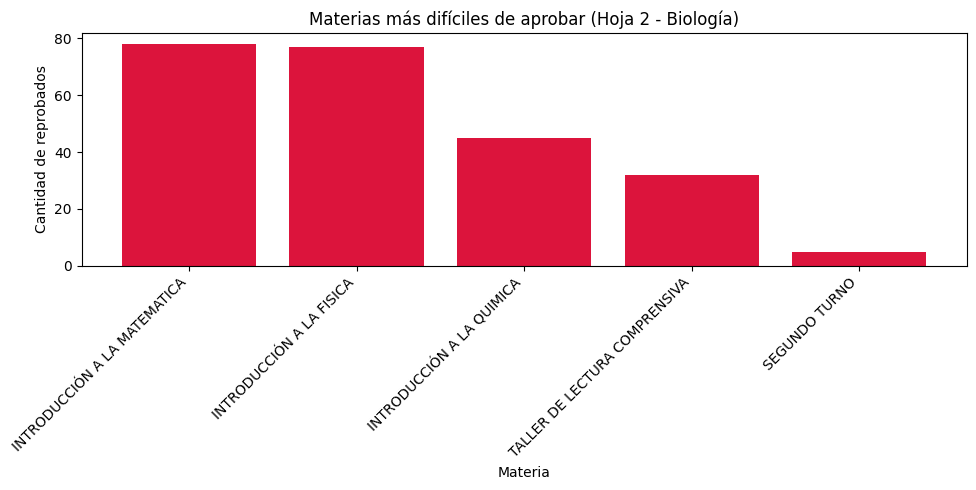

In [ ]:
# Refrescar df2_biologia con observación
df2_biologia = df2[df2['carrera'] == 'biologia'].copy()
df2_biologia['observacion'] = df2_biologia['nota'].apply(clasificar_observacion)

# Agrupar por materia y contar reprobados
materias_dificiles_df2 = (
    df2_biologia[df2_biologia['observacion'] == 'Reprobado']
    .groupby('materia')
    .size()
    .reset_index(name='cantidad_reprobados')
    .sort_values('cantidad_reprobados', ascending=False)
)

# Mostrar top 10 más difíciles
print("Top materias más difíciles (más reprobados) – Hoja 2")
display(materias_dificiles_df2.head(10))

# Gráfico de columnas
plt.figure(figsize=(10, 5))
plt.bar(materias_dificiles_df2['materia'].head(10), materias_dificiles_df2['cantidad_reprobados'].head(10), color='crimson')
plt.title("Materias más difíciles de aprobar (Hoja 2 - Biología)")
plt.xlabel("Materia")
plt.ylabel("Cantidad de reprobados")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En la 2da Hoja vemos que la materia mas dificil es Introduccion a la Matemática si tomamos en cuenta los Reprobados.

# Materias mas faciles de aprobar

Top materias más fáciles (más aprobados) – Hoja 2


,materia,cantidad_aprobados
4,TALLER DE LECTURA COMPRENSIVA,108
2,INTRODUCCIÓN A LA QUIMICA,86
0,INTRODUCCIÓN A LA FISICA,49
1,INTRODUCCIÓN A LA MATEMATICA,38
3,SEGUNDO TURNO,7


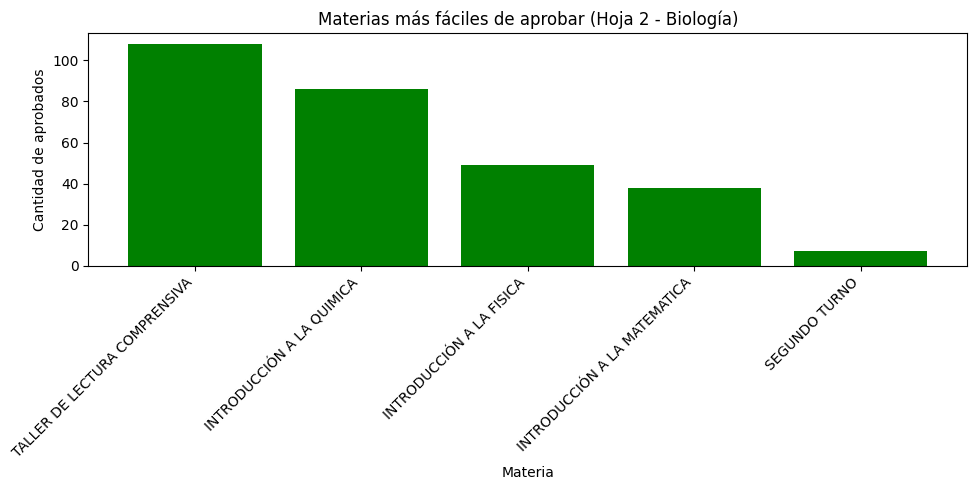

In [ ]:
# Refrescar df2_biologia con observación
df2_biologia = df2[df2['carrera'] == 'biologia'].copy()
df2_biologia['observacion'] = df2_biologia['nota'].apply(clasificar_observacion)

# Agrupar por materia y contar aprobados
materias_faciles_df2 = (
    df2_biologia[df2_biologia['observacion'] == 'Aprobado']
    .groupby('materia')
    .size()
    .reset_index(name='cantidad_aprobados')
    .sort_values('cantidad_aprobados', ascending=False)
)

# Mostrar top 10 materias más fáciles
print("Top materias más fáciles (más aprobados) – Hoja 2")
display(materias_faciles_df2.head(10))

# Gráfico de columnas
plt.figure(figsize=(10, 5))
plt.bar(materias_faciles_df2['materia'].head(10), materias_faciles_df2['cantidad_aprobados'].head(10), color='green')
plt.title("Materias más fáciles de aprobar (Hoja 2 - Biología)")
plt.xlabel("Materia")
plt.ylabel("Cantidad de aprobados")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En la 2da hoja de NotasMade, la materia mas facil de aprobar es Taller de lectura comprensiva.

# Observacion de notas finales por gestión y periodo Hoja 2

Observación final por gestión y periodo (Hoja 2 - Biología, por estudiante)


observacion,Abandono,Aprobado,Reprobado
etiqueta,,,
2020 - PRIMERO,29.0,36.0,17.0
2020 - PRIMERO (2T),0.0,7.0,5.0
2020 - PRIMERO (PSA),0.0,3.0,12.0
2020 - SEGUNDO,36.0,37.0,27.0


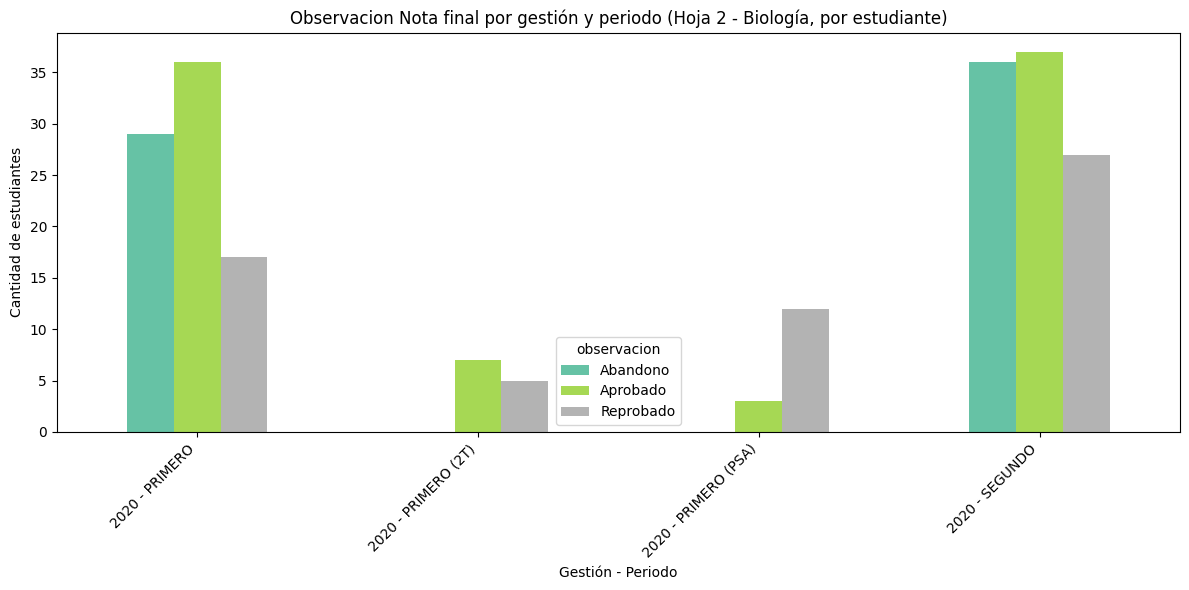

In [ ]:
# Agrupación por gestión, periodo y observación final (por estudiante)
obs_por_gestion_periodo_df2 = (
    df2_resultado_biologia.groupby(['gestión', 'periodo', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

# Crear columna de etiqueta combinada
obs_por_gestion_periodo_df2['etiqueta'] = (
    obs_por_gestion_periodo_df2['gestión'].astype(str) + ' - ' + obs_por_gestion_periodo_df2['periodo']
)

# Pivot para gráfico
pivot_obs_gp_df2 = obs_por_gestion_periodo_df2.pivot(index='etiqueta', columns='observacion', values='cantidad').fillna(0)

# Mostrar tabla de resumen
print("Observación final por gestión y periodo (Hoja 2 - Biología, por estudiante)")
display(pivot_obs_gp_df2)

# Gráfico de barras
import matplotlib.pyplot as plt

pivot_obs_gp_df2.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Observacion Nota final por gestión y periodo (Hoja 2 - Biología, por estudiante)")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Gestión - Periodo")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Vemos que en la gestion 2020 Segundo periodo es en donde hubo mas aprobados y tambien en donde mas abandono hubo y mas Reprobados salieron, seguido del Primer periodo de la misma gestion, observando tambien que en la PSA del Primer periodo hubo muchos Reprobados, recalcando que aun no habia llegado el Covid2019 a La Paz Bolivia en ese entonces.

# Estudiantes inscritos por gestión y periodo Hoja 2

📌 Número de estudiantes inscritos por gestión y periodo – Hoja 2


,gestión,periodo,inscritos
0,2020,PRIMERO,82
1,2020,PRIMERO (2T),12
2,2020,PRIMERO (PSA),15
3,2020,SEGUNDO,100


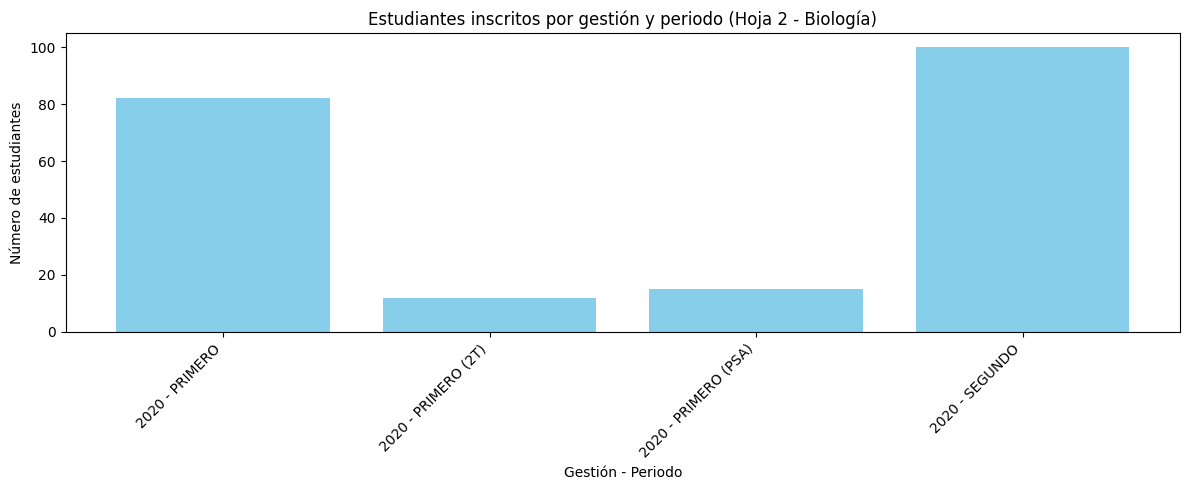

In [ ]:
# Refrescar df2_biologia
df2_biologia = df2[df2['carrera'] == 'biologia'].copy()

# Contar estudiantes únicos por gestión y periodo
inscritos_df2 = (
    df2_biologia.groupby(['gestión', 'periodo'])['c.i.']
    .nunique()
    .reset_index(name='inscritos')
)

# Mostrar tabla
print("📌 Número de estudiantes inscritos por gestión y periodo – Hoja 2")
display(inscritos_df2)

# Gráfico de barras
inscritos_df2['etiqueta'] = inscritos_df2['gestión'].astype(str) + ' - ' + inscritos_df2['periodo']

plt.figure(figsize=(12, 5))
plt.bar(inscritos_df2['etiqueta'], inscritos_df2['inscritos'], color='skyblue')
plt.title("Estudiantes inscritos por gestión y periodo (Hoja 2 - Biología)")
plt.ylabel("Número de estudiantes")
plt.xlabel("Gestión - Periodo")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En la 2da hoja vemos que en la gestion 2020 Segundo periodo es cuando se tuvo mas estudiantes.

# Observacion final por periodo Hoja 2

Cantidad de observaciones finales por periodo – Hoja 2 (por estudiante)


observacion,Abandono,Aprobado,Reprobado
periodo,,,
PRIMERO,29.0,36.0,17.0
PRIMERO (2T),0.0,7.0,5.0
PRIMERO (PSA),0.0,3.0,12.0
SEGUNDO,36.0,37.0,27.0


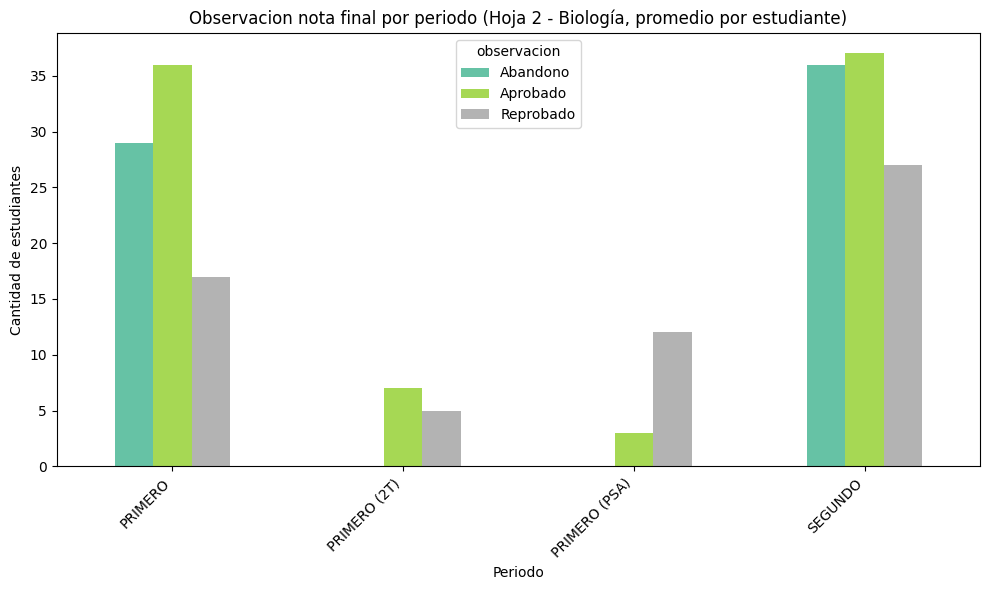

🟢 En Hoja 2, PERIODO con MÁS ABANDONO: SEGUNDO
🔴 En Hoja 2, PERIODO con MENOS ABANDONO: PRIMERO (2T)

🟢 En Hoja 2, PERIODO con MÁS REPROBADO: SEGUNDO
🔴 En Hoja 2, PERIODO con MENOS REPROBADO: PRIMERO (2T)

🟢 En Hoja 2, PERIODO con MÁS APROBADO: SEGUNDO
🔴 En Hoja 2, PERIODO con MENOS APROBADO: PRIMERO (PSA)



In [ ]:
# Agrupar por periodo y observación (ya con promedios por estudiante)
periodo_estado_df2 = (
    df2_resultado_biologia.groupby(['periodo', 'observacion'])
    .size()
    .reset_index(name='cantidad')
)

# Pivot para graficar
pivot_periodo_df2 = periodo_estado_df2.pivot(index='periodo', columns='observacion', values='cantidad').fillna(0)

# Mostrar tabla
print("Cantidad de observaciones finales por periodo – Hoja 2 (por estudiante)")
display(pivot_periodo_df2)

# Gráfico
pivot_periodo_df2.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Observacion nota final por periodo (Hoja 2 - Biología, promedio por estudiante)")
plt.ylabel("Cantidad de estudiantes")
plt.xlabel("Periodo")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Máximos y mínimos por estado
for obs in ['Abandono', 'Reprobado', 'Aprobado']:
    if obs in pivot_periodo_df2.columns:
        print(f"🟢 En Hoja 2, PERIODO con MÁS {obs.upper()}: {pivot_periodo_df2[obs].idxmax()}")
        print(f"🔴 En Hoja 2, PERIODO con MENOS {obs.upper()}: {pivot_periodo_df2[obs].idxmin()}\n")


Al solo tener los datos de una sola gestion en esta Hoja 2 vemos que solo redundamos los abandonos, reprobados y aprobados por gestion y no se puede hacer el analisis sumando todos los periodos.